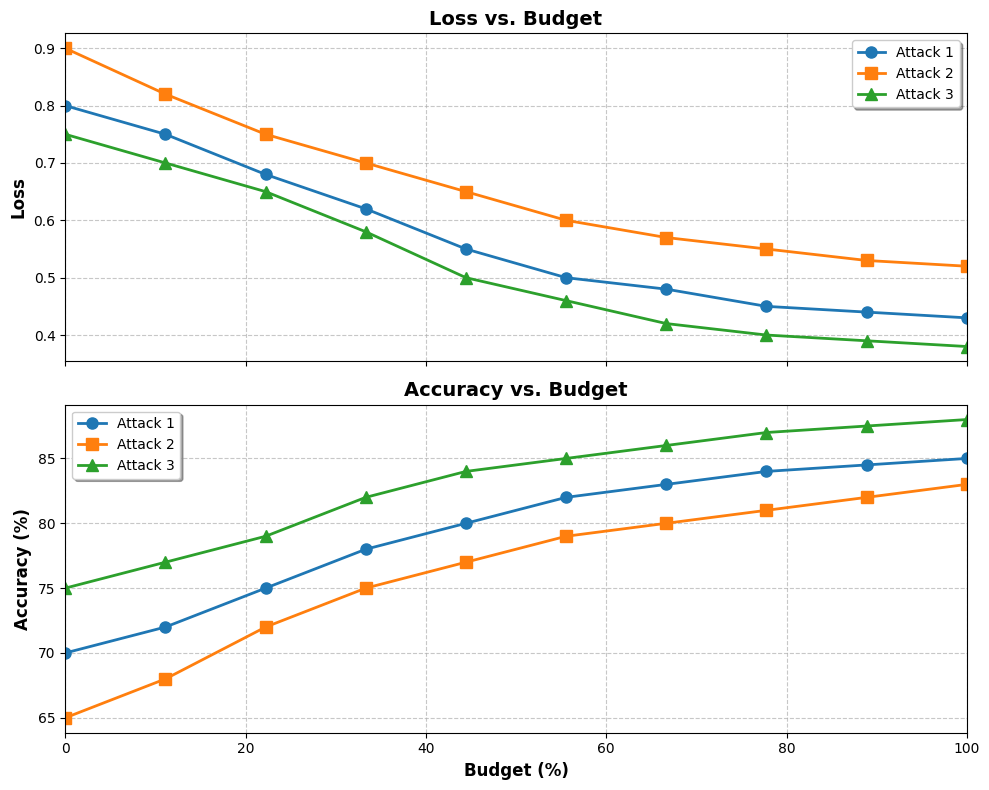

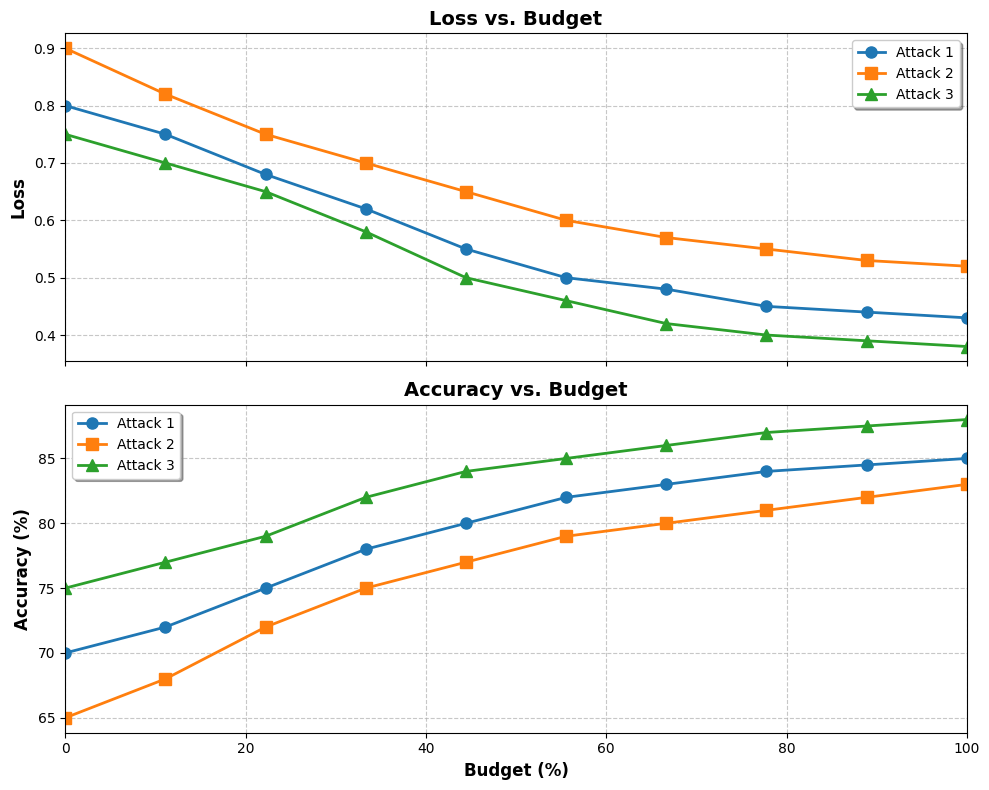

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_attack_comparison(attack_data, budget_range=None, figsize=(12, 10), dpi=100, 
                               save_path=None, custom_colors=None, custom_markers=None):
    """
    Visualize multiple attack results with loss and accuracy plots.
    
    Parameters:
    -----------
    attack_data : dict
        Dictionary where keys are attack names and values are tuples of (loss_values, accuracy_values)
    budget_range : list or numpy.ndarray, optional
        Custom x-axis values representing budget percentages (0-100%). 
        If None, will use range from 0 to 100 with length matching the data.
    figsize : tuple, optional
        Figure size (width, height) in inches
    dpi : int, optional
        Figure resolution
    save_path : str, optional
        Path to save the figure. If None, the figure will be displayed but not saved.
    custom_colors : list, optional
        List of colors to use for different attacks. If None, default colors will be used.
    custom_markers : list, optional
        List of markers to use for different attacks. If None, default markers will be used.
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The generated figure object
    """
    if not attack_data:
        raise ValueError("No attack data provided")
    
    # Set up default colors and markers if not provided
    if custom_colors is None:
        custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    if custom_markers is None:
        custom_markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    # Create figure with two subplots (loss and accuracy)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, dpi=dpi, sharex=True)
    
    # Find the maximum length of data to create default budget range if not provided
    max_length = 0
    for loss_values, acc_values in attack_data.values():
        max_length = max(max_length, len(loss_values), len(acc_values))
    
    # Create default budget range if not provided
    if budget_range is None:
        budget_range = np.linspace(0, 100, max_length)
    
    # Plot each attack's data
    for i, (attack_name, (loss_values, acc_values)) in enumerate(attack_data.items()):
        color_idx = i % len(custom_colors)
        marker_idx = i % len(custom_markers)
        
        # Ensure budget range aligns with data length
        budget_loss = np.linspace(0, 100, len(loss_values)) if budget_range is None else budget_range[:len(loss_values)]
        budget_acc = np.linspace(0, 100, len(acc_values)) if budget_range is None else budget_range[:len(acc_values)]
        
        # Plot loss values
        ax1.plot(budget_loss, loss_values, 
                 label=attack_name, 
                 color=custom_colors[color_idx],
                 marker=custom_markers[marker_idx], 
                 markersize=8, 
                 linewidth=2,
                 markevery=max(1, len(loss_values)//10))
        
        # Plot accuracy values
        ax2.plot(budget_acc, acc_values, 
                 label=attack_name, 
                 color=custom_colors[color_idx],
                 marker=custom_markers[marker_idx], 
                 markersize=8, 
                 linewidth=2,
                 markevery=max(1, len(acc_values)//10))
    
    # Customize loss subplot
    ax1.set_title('Loss vs. Budget', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    
    # Customize accuracy subplot
    ax2.set_title('Accuracy vs. Budget', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Budget (%)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    
    # Set x-axis limits
    ax2.set_xlim(min(budget_range), max(budget_range))
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure if path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    
    return fig

# Example usage:
def example_usage():
    # Example data: (attack_name: (loss_values, accuracy_values))
    attack_data = {
        'Attack 1': (
            [0.8, 0.75, 0.68, 0.62, 0.55, 0.5, 0.48, 0.45, 0.44, 0.43],  # Loss values
            [70, 72, 75, 78, 80, 82, 83, 84, 84.5, 85]                   # Accuracy values
        ),
        'Attack 2': (
            [0.9, 0.82, 0.75, 0.7, 0.65, 0.6, 0.57, 0.55, 0.53, 0.52],   # Loss values
            [65, 68, 72, 75, 77, 79, 80, 81, 82, 83]                      # Accuracy values
        ),
        'Attack 3': (
            [0.75, 0.7, 0.65, 0.58, 0.5, 0.46, 0.42, 0.4, 0.39, 0.38],   # Loss values
            [75, 77, 79, 82, 84, 85, 86, 87, 87.5, 88]                    # Accuracy values
        )
    }
    
    # Custom budget range (0-100%)
    budget_range = np.linspace(0, 100, 10)
    
    # Create visualization
    fig = visualize_attack_comparison(
        attack_data=attack_data,
        budget_range=budget_range,
        figsize=(10, 8),
        save_path="attack_comparison.png"
    )
    
    # Display plot
    plt.show()
    
    return fig

# Uncomment to run example
example_usage()